# Loss plots

In [ ]:
import matplotlib.pyplot as plt

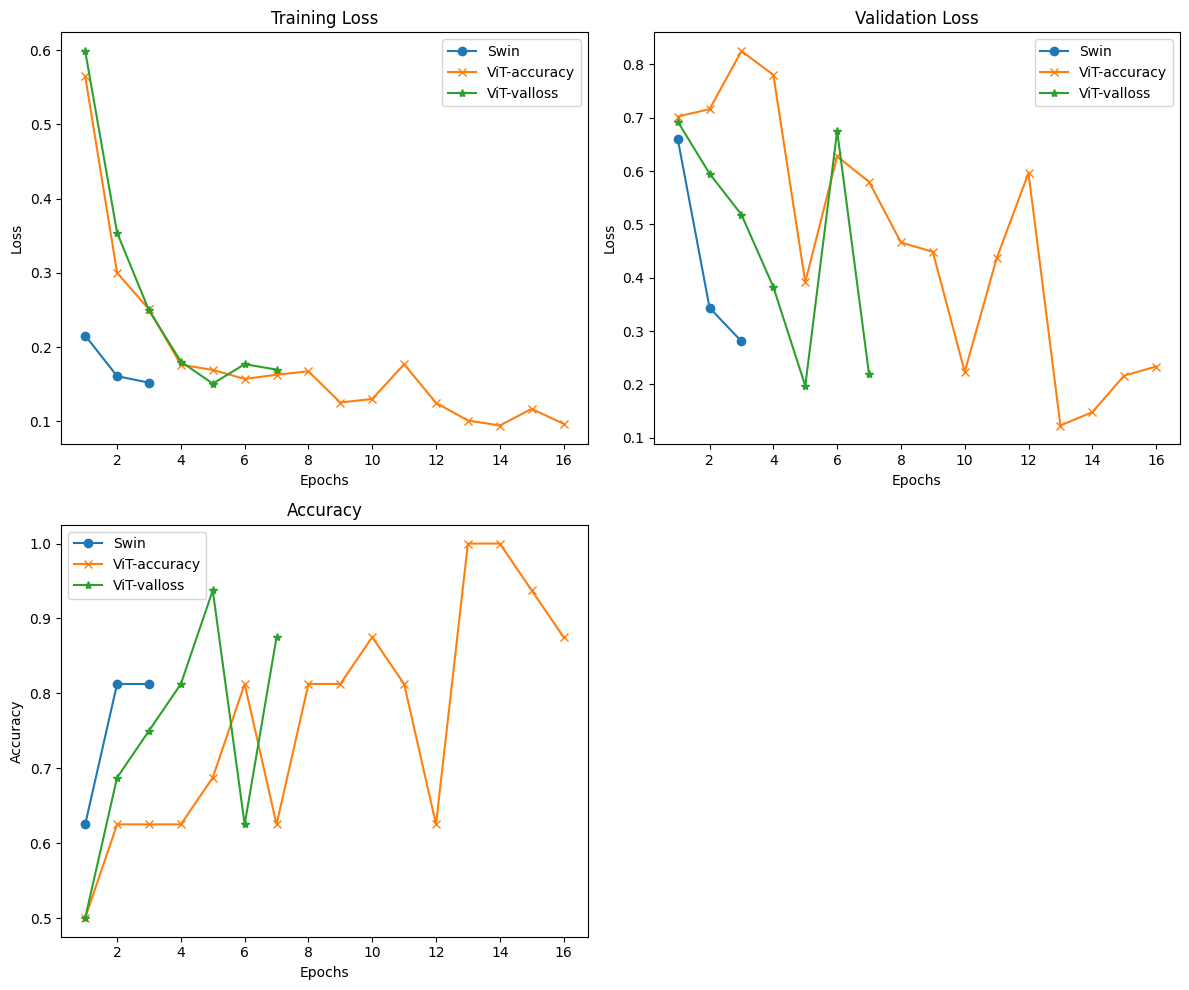

In [ ]:
epochs_swin = [1, 2, 3]  # Epochs for Swin model
epochs_vit = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  # Epochs for ViT model
epochs_vit2 = [1, 2, 3, 4, 5, 6, 7]

# Swin model: [train_loss, val_loss, train_accuracy, val_accuracy]
train_loss_swin = [0.2157, 0.161, 0.1522]
val_loss_swin = [0.660731, 0.343515, 0.280652]
accuracy_swin = [0.625, 0.8125, 0.8125]

# Vit-accuracy model: [train_loss, val_loss, train_accuracy, val_accuracy]
train_loss_vit = [0.5651, 0.3002, 0.251, 0.1763, 0.1694, 0.1572, 0.1629, 0.1675, 0.1254, 0.1303, 0.177, 0.125, 0.1012, 0.0945, 0.1169, 0.0968]
val_loss_vit = [0.702092, 0.716198, 0.825004, 0.780307, 0.391604, 0.627469, 0.579757, 0.466154, 0.448399, 0.223478, 0.4362, 0.596389, 0.122845, 0.147816, 0.216367, 0.233346]
accuracy_vit = [0.5, 0.625, 0.625, 0.625, 0.6875, 0.8125, 0.625, 0.8125, 0.8125, 0.875, 0.8125, 0.625, 1, 1, 0.9375, 0.875]

# Vit-valloss model: [train_loss, val_loss, train_accuracy, val_accuracy]
train_loss_vit2 = [0.5989, 0.3542, 0.2495, 0.1806, 0.1509, 0.1771, 0.1698]
val_loss_vit2 = [0.69286, 0.595085, 0.518168, 0.382479, 0.197244, 0.675169, 0.218729]
accuracy_vit2 = [0.5, 0.6875, 0.75, 0.8125, 0.9375, 0.625, 0.875]

# Create subplots to compare the metrics
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Training Loss Plot
axs[0, 0].plot(epochs_swin, train_loss_swin, label='Swin', marker='o')
axs[0, 0].plot(epochs_vit, train_loss_vit, label='ViT-accuracy', marker='x')
axs[0, 0].plot(epochs_vit2, train_loss_vit2, label='ViT-valloss', marker='*')
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Validation Loss Plot
axs[0, 1].plot(epochs_swin, val_loss_swin, label='Swin', marker='o')
axs[0, 1].plot(epochs_vit, val_loss_vit, label='ViT-accuracy', marker='x')
axs[0, 1].plot(epochs_vit2, val_loss_vit2, label='ViT-valloss', marker='*')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Training Accuracy Plot
axs[1, 0].plot(epochs_swin, accuracy_swin, label='Swin', marker='o')
axs[1, 0].plot(epochs_vit, accuracy_vit, label='ViT-accuracy', marker='x')
axs[1, 0].plot(epochs_vit2, accuracy_vit2, label='ViT-valloss', marker='*')
axs[1, 0].set_title('Accuracy')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Remove the empty subplot if there are only 3 plots to display
fig.delaxes(axs[1, 1])

# Display the plots
plt.tight_layout()
plt.show()

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/My Drive/Drexel/MEM679/chest_xray'

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

dataset = load_dataset('imagefolder', data_dir=data_dir,
                       split={'test': 'test'})

Resolving data files:   0%|          | 0/5216 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/624 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

# Load your models

In [ ]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained("Towen/vit-base-patch16-224-in21k-finetuned")
model = AutoModelForImageClassification.from_pretrained("Towen/vit-base-patch16-224-in21k-finetuned")

image_processor2 = AutoImageProcessor.from_pretrained("Towen/vit-base-patch16-224-in21k-finetuned-earlystop")
model2 = AutoModelForImageClassification.from_pretrained("Towen/vit-base-patch16-224-in21k-finetuned-earlystop")

preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

# Confusion matrix

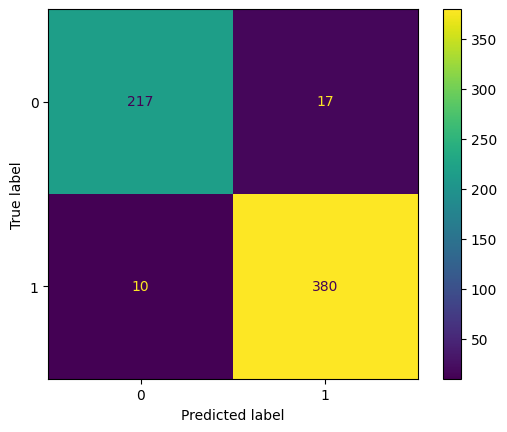

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true_vit = []
y_pred_vit = []

for i in dataset['test']:
    encoding = image_processor(i['image'].convert("RGB"), return_tensors="pt")

    # forward pass
    with torch.no_grad():
        outputs = model(**encoding)
        logits = outputs.logits

    predicted_class_idx = logits.argmax(-1).item()
    y_true_vit.append(i['label'])
    y_pred_vit.append(predicted_class_idx)

# Calculate confusion matrix
cm = confusion_matrix(y_true_vit, y_pred_vit)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

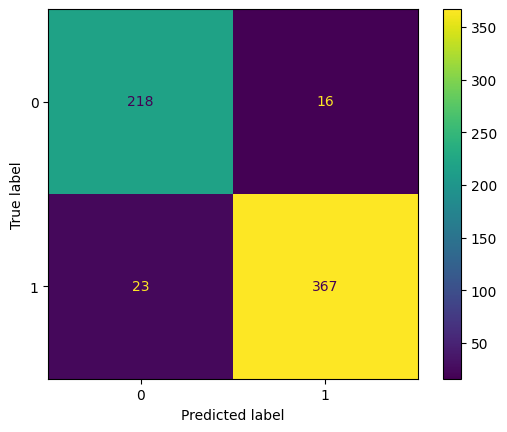

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true_vit = []
y_pred_vit = []

for i in dataset['test']:
    encoding = image_processor2(i['image'].convert("RGB"), return_tensors="pt")

    # forward pass
    with torch.no_grad():
        outputs = model2(**encoding)
        logits = outputs.logits

    predicted_class_idx = logits.argmax(-1).item()
    y_true_vit.append(i['label'])
    y_pred_vit.append(predicted_class_idx)

# Calculate confusion matrix
cm = confusion_matrix(y_true_vit, y_pred_vit)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# AOC curve

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for Vit-accuracy
probs_vit = []
for i in dataset['test']:
    encoding = image_processor(i['image'].convert("RGB"), return_tensors="pt")
    with torch.no_grad():
        outputs = model(**encoding)
        logits = outputs.logits
    probs_vit.extend(torch.softmax(logits, dim=1)[:, 1].cpu().numpy())

# Get predicted probabilities for Vit-valloss
probs_vit2 = []
for i in dataset['test']:
    encoding = image_processor2(i['image'].convert("RGB"), return_tensors="pt")
    with torch.no_grad():
        outputs = model2(**encoding)
        logits = outputs.logits
    probs_vit2.extend(torch.softmax(logits, dim=1)[:, 1].cpu().numpy())

# Calculate ROC curve and AUC for Vit-accuracy
fpr_vit, tpr_vit, _ = roc_curve(y_true_vit, probs_vit)
roc_auc_vit = auc(fpr_vit, tpr_vit)

# Calculate ROC curve and AUC for Vit-valloss
fpr_vit2, tpr_vit2, _ = roc_curve(y_true_vit, probs_vit2)
roc_auc_vit2 = auc(fpr_vit2, tpr_vit2)

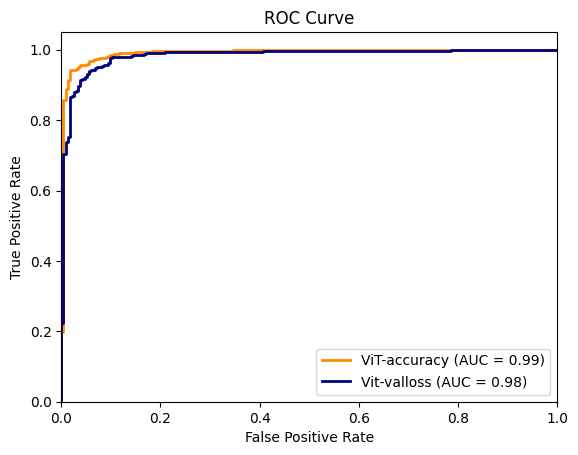

In [ ]:
# Plot ROC curves
plt.figure()
plt.plot(fpr_vit, tpr_vit, color='darkorange', lw=2, label='ViT-accuracy (AUC = %0.2f)' % roc_auc_vit)
plt.plot(fpr_vit2, tpr_vit2, color='navy', lw=2, label='Vit-valloss (AUC = %0.2f)' % roc_auc_vit2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()